<Axes: title={'center': 'Sales and Revenue by City and Branch'}, xlabel='City,Branch'>

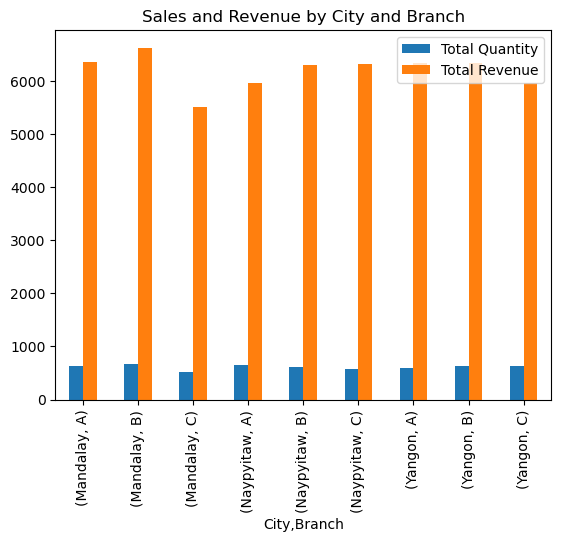

In [2]:
# 1) Walmart Sales Analysis

import pandas as pd

# Load the dataset
df = pd.read_excel("Walmart Sales.xlsx")

# Group by city and branch, then calculate sales and revenue
sales_revenue_city_branch = df.groupby(['City', 'Branch']).agg({'Quantity': 'sum', 'Unit price': 'sum'})
sales_revenue_city_branch.rename(columns={'Quantity': 'Total Quantity', 'Unit price': 'Total Revenue'}, inplace=True)

# Visualize the results
sales_revenue_city_branch.plot(kind='bar', title='Sales and Revenue by City and Branch')

In [3]:
# 2) App Exploration

# Calculate average price of an item sold at each branch of the city
average_price_per_branch = df.groupby(['City', 'Branch'])['Unit price'].mean()

# Display the average price
print(average_price_per_branch)

City       Branch
Mandalay   A         53.353866
           B         56.133305
           C         57.958316
Naypyitaw  A         54.123182
           B         57.785688
           C         57.941009
Yangon     A         55.639298
           B         56.011062
           C         52.684602
Name: Unit price, dtype: float64


In [14]:
# 3) Product Optimisation

# Filter data for the first three months (January, February, and March)
first_three_months_data = df[df['Date'].dt.month.isin([1, 2, 3])]

# Group by Product line, Gender, Payment Method, and Month, then calculate sales and revenue
monthly_performance = first_three_months_data.groupby(['Product line', 'Gender', 'Payment', first_three_months_data['Date'].dt.month]).agg({'Quantity': 'sum', 'Unit price': 'sum'})
monthly_performance.rename(columns={'Quantity': 'Total Quantity', 'Unit price': 'Total Revenue'}, inplace=True)

# Display the analysis
print(monthly_performance)

                                                Total Quantity  Total Revenue
Product line           Gender Payment     Date                               
Electronic accessories Female Cash        1                 52         534.48
                                          2                103         935.40
                                          3                 51         622.23
                              Credit card 1                 54         371.20
                                          2                 39         444.19
...                                                        ...            ...
Sports and travel      Male   Credit card 2                 27         410.63
                                          3                 60         483.38
                              Ewallet     1                 38         466.37
                                          2                 15         236.25
                                          3                 86  

### Some focus areas for improvement for April 2019

Product Line
For Electronic accessories, there seems to be a decline in Total Quantity and Total Revenue from January to February
and then a slight increase in March. However, the performance in March is still lower compared to January. Strategies
to boost sales for this product line could include targeted promotions, bundling offers, or introducing new products.
Similarly, for Sports and travel products, there's a noticeable increase in both Total Quantity and Total Revenue from
January to March, especially for payments made via Ewallet. To maintain or further improve this positive trend, the focus
could be on enhancing the visibility of these products, improving customer experience, and optimizing marketing strategies.

Gender
There's variability in purchasing patterns between genders. For instance, in Electronic accessories, females tend to purchase
more compared to males, especially in January and February. This could indicate that there might be specific preferences or
needs among female customers that the company can cater to with targeted marketing campaigns or product offerings.

Payment Method
The choice of payment method also shows some interesting trends. For instance, in Sports and travel products, there's a 
significant increase in Total Quantity and Total Revenue for payments made via Ewallet from January to March. This suggests
that promoting Ewallet usage or offering incentives for using this payment method could be beneficial in driving sales.

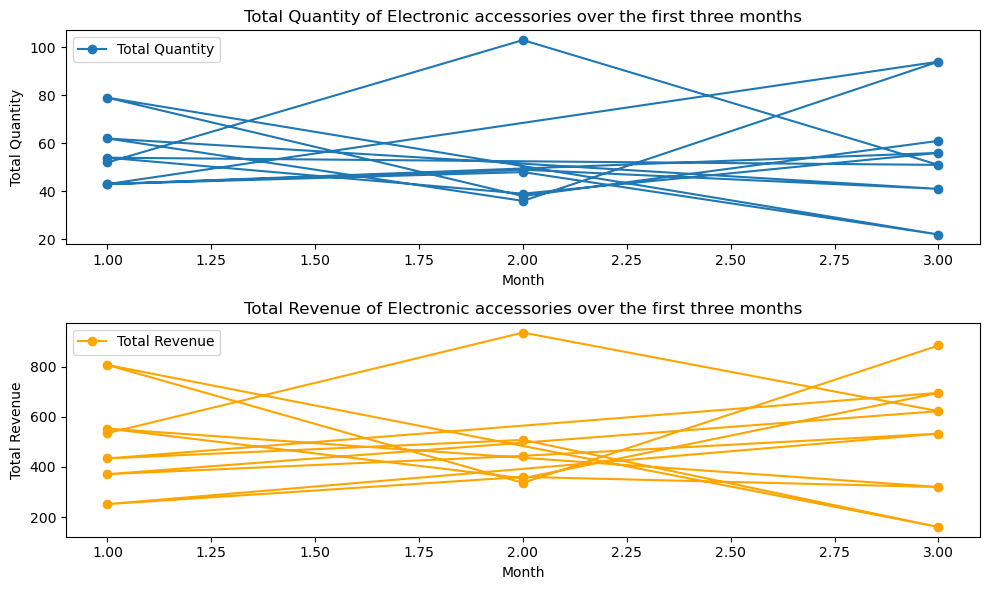

In [15]:
import matplotlib.pyplot as plt

# Filter data for each product line
electronic_accessories_data = monthly_performance.loc["Electronic accessories"]
sports_travel_data = monthly_performance.loc["Sports and travel"]

# Plotting Total Quantity and Total Revenue for Electronic accessories
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(electronic_accessories_data.index.get_level_values('Date'), electronic_accessories_data['Total Quantity'], marker='o', label='Total Quantity')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.title('Total Quantity of Electronic accessories over the first three months')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(electronic_accessories_data.index.get_level_values('Date'), electronic_accessories_data['Total Revenue'], marker='o', color='orange', label='Total Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Total Revenue of Electronic accessories over the first three months')
plt.legend()

plt.tight_layout()
plt.show()

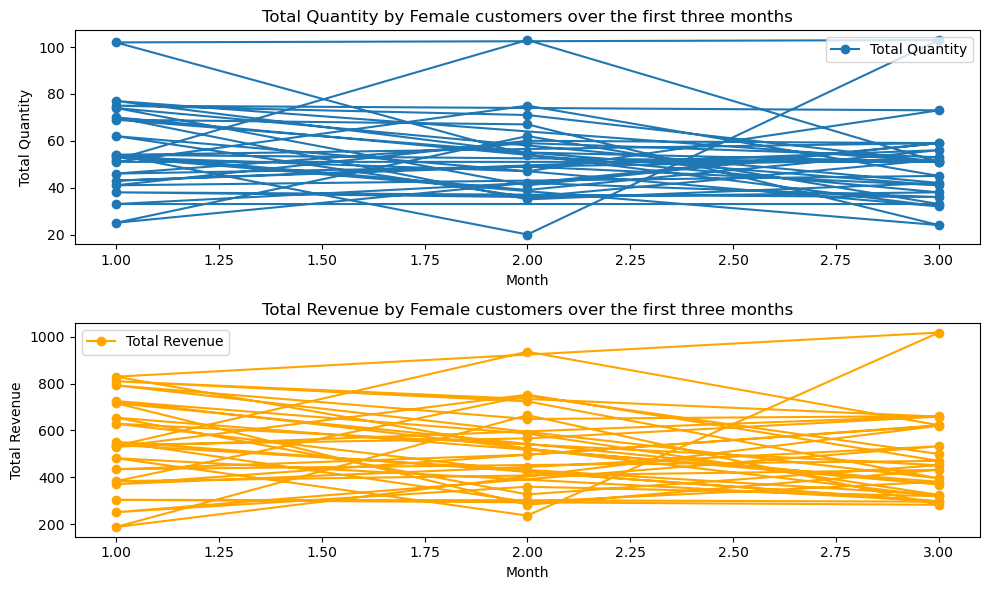

In [16]:
# Filter data for each gender
female_data = monthly_performance.loc[(slice(None), 'Female'), :]
male_data = monthly_performance.loc[(slice(None), 'Male'), :]

# Plotting Total Quantity and Total Revenue for Female customers
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(female_data.index.get_level_values('Date'), female_data['Total Quantity'], marker='o', label='Total Quantity')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.title('Total Quantity by Female customers over the first three months')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(female_data.index.get_level_values('Date'), female_data['Total Revenue'], marker='o', color='orange', label='Total Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Female customers over the first three months')
plt.legend()

plt.tight_layout()
plt.show()

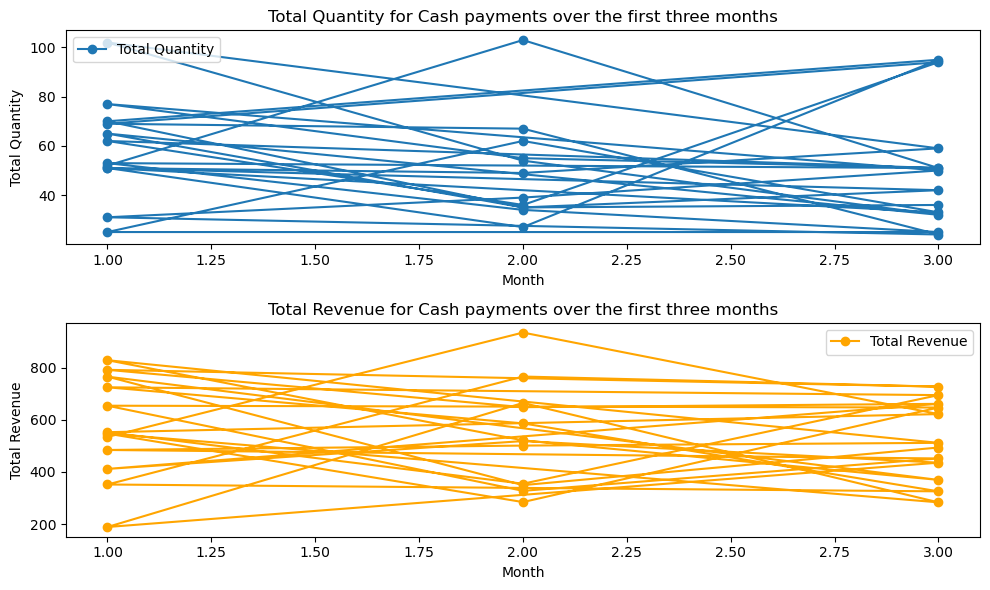

In [17]:
# Filter data for each payment method
cash_data = monthly_performance.loc[(slice(None), slice(None), 'Cash'), :]
credit_card_data = monthly_performance.loc[(slice(None), slice(None), 'Credit card'), :]
ewallet_data = monthly_performance.loc[(slice(None), slice(None), 'Ewallet'), :]

# Plotting Total Quantity and Total Revenue for Cash payments
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(cash_data.index.get_level_values('Date'), cash_data['Total Quantity'], marker='o', label='Total Quantity')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.title('Total Quantity for Cash payments over the first three months')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(cash_data.index.get_level_values('Date'), cash_data['Total Revenue'], marker='o', color='orange', label='Total Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Total Revenue for Cash payments over the first three months')
plt.legend()

plt.tight_layout()
plt.show()